(ch6:mle)=
# Estimating Parameters in Network Models via MLE

When you learned about random networks which can be described using single network models, one of the key things we covered were the *parameters* that define the underlying random networks. If you see a network in practice and want to learn about it, you have to make sets of assumptions. One of these assumptions you made in the preceding chapter, namely, is that the network is a sample of a random network, which obeys particular rules as to how it behaves. However, you have a slight problem, because learning about an underlying random network *requires* us to have some understanding of the parameters that define it. What are you to do?

## Erdös-Rényi (ER)

Recall that the Erdös-Rényi (ER) network has a single parameter: the probability of each edge existing, which we termed $p$. Due to the simplicity of an ER random network, we can resort to a technique called Maximum Likelihood Estimation (MLE), through which you can obtain a reasonable *guess* at $p$, which for various reasons, is *desirable*. You can look at the appendix {ref}`app:ch13:mle` for justification for the utility of this estimator.

We'll develop some intuition for this procedure by going back to our coin flip example. You have a coin, for which you don't know the probability it lands on heads is. However, you are told you can flip that coin, and after $100$ flips, you have to guess what the probability of heads is for the coin. For instance, if you flip the coin $100$ times, and it lands on heads $45$ times, what would you guess that the probability the coin lands on heads would be?

If you thought to yourself that you would guess $\frac{45}{100}$, which is just the ratio of the number of heads that you saw to the total number of coin flips, you would have a pretty good estimate. This is called the *maximum likelihood estimate* of the probability for a binary (heads or tails, $1$ or $0$) random variable. For the ER random network, this works exactly the same way. You find that the best estimate of the probability of an edge existing in an ER random network is just the ratio of the total number of edges in the network, $m$, divided by the total number of edges possible in the network, which is $\binom n 2$! Our result is:
\begin{align*}
    \hat p &= \frac{m}{\binom n 2}.
\end{align*}

To bring this back to our coin flip example, this is like you are saying that there is a single coin. You flip the coin once for every possible edge between those pairs of communities, $\binom n 2$. When that coin lands on heads, that particular edge is determined to exist, and when it lands on tails, that edge does not exist. Our best guess, then, is just to count the number of heads you obtained, $m$, and divide by the number of coin flips you made, $\binom n 2$. 

Let's work on an example. You will use a sample of a random network which is ER, with $40$ nodes and an edge probability of $0.2$. We begin by simulating and visualizing the appropriate network: 

In [1]:
from graspologic.simulations import er_np

p = 0.2
A = er_np(n=40, p=p)

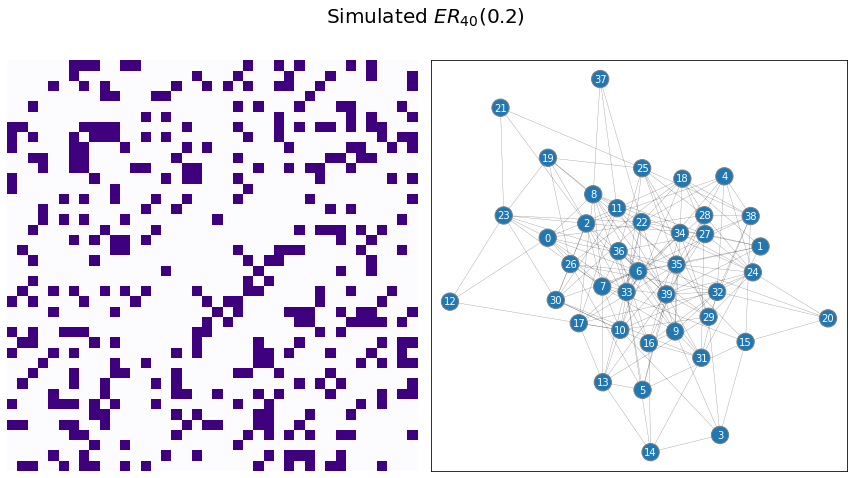

In [2]:
from graphbook_code import draw_multiplot
draw_multiplot(A, title="Simulated $ER_{40}(0.2)$");

Next, you fit the appropriate model, from graspologic, and plot the estimated probability matrix $\hat P$ against the true probability matrix $P$:

In [3]:
import numpy as np
from graspologic.models import EREstimator

model = EREstimator(directed=False, loops=False)
model.fit(A)
Phat = model.p_mat_

P = p*np.ones((40, 40))  # default entries to 0.2

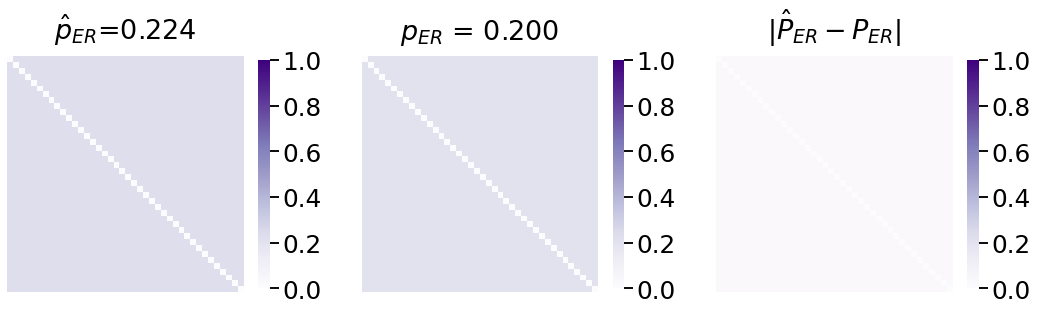

In [8]:
from graphbook_code import heatmap
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

heatmap(Phat,
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="$\hat p_{{ER}}$={:.3f}".format(model.p_),
        ax=axs[0])

P = P - np.diag(np.diag(P))

heatmap(P,
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="$p_{{ER}}$ = {:.3f}".format(p),
        ax=axs[1])

heatmap(np.abs(Phat - P),
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="$|\hat P_{ER} - P_{ER}|$",
        ax=axs[2])

fig;

Not half bad! The estimated probability matrix $\hat P$ looks extremely similar to the true probability matrix $P$.


## Stochastic Block Model

The Stochastic Block Model also has a single parameter: the block matrix, $B$, whose entries $b_{kk'}$ denote the probabilities of edges existing or not existing between pairs of communities in the Stochastic Block Model. When you apply the method of MLE to the SBM, what you find is that, where $m_{kk'}$ is the total number of edges between nodes in communities $k$ and $k'$, and $n_{kk'}$ is the number of edges possible between nodes in communities $k$ and $k'$:

\begin{align*}
    \hat b_{kk'} = \frac{m_{kk'}}{n_{kk'}}.
\end{align*}

Intuitively, the estimate of the block probability $b_{kk'}$ is the ratio of how many edges you see between communities $k$ and $k'$ $m_{kk'}$ and how many edges you could have seen $n_{kk'}$! To bring this back to our coin flip example, this is like you are saying that there is one coin called coin $(k, k')$ for each pair of communities in our network. You flip each coin once for every possible edge between those pairs of communities, $n_{kk'}$. When that coin lands on heads, that particular edge is determined to exist, and when it lands on tails, that edge does not exist. Our best guess, then, is just to count the number of heads you obtained, $m_{kk'}$, and divide by the number of coin flips you made, $n_{kk'}$. 

Remember that in the example we worked through in {ref}`ch5:sbm`, you had $100$ students, each of whom were in one of two schools (school $1$ and school $2$). If the students were both in school $1$, the probability that they were friends was $0.6$, and if the students were both in school $2$, the probability that they were friends was $0.4$. If the students attended different schools, the probability that they were friends was $0.2$. This gave us a block matrix of:
\begin{align*}
    B &= \begin{bmatrix}
        .6 & .2 \\
        .2 & .4
    \end{bmatrix}
\end{align*}

Which corresponds to a probability matrix $P$ where each entry is:
\begin{align*}
    p_{ij} &= \begin{cases}
    0.8 & i, j \leq 20 \text{ or }i, j \geq 20 \\
    0.2 & \text{otherwise}
    \end{cases}
\end{align*}

You begin by simulating an appropriate SBM:

In [16]:
from graspologic.simulations import sbm

n = [50, 50]
B = [[.6, .2],
     [.2, .4]]

A = sbm(n=n, p=B)

z = [0 for i in range(0,n[0])] + [1 for i in range(0, n[1])]

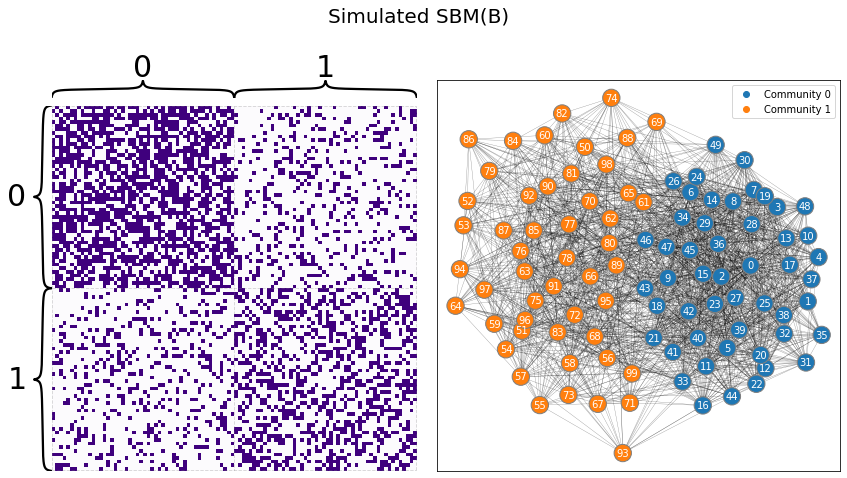

In [17]:
draw_multiplot(A, labels=z, title="Simulated SBM(B)");

Next, let's fit an appropriate SBM, and investigate the estimate of $B$:

In [18]:
from graspologic.models import SBMEstimator

model = SBMEstimator(directed=False, loops=False)
model.fit(A, y=z)
Bhat = model.block_p_
Phat = model.p_mat_

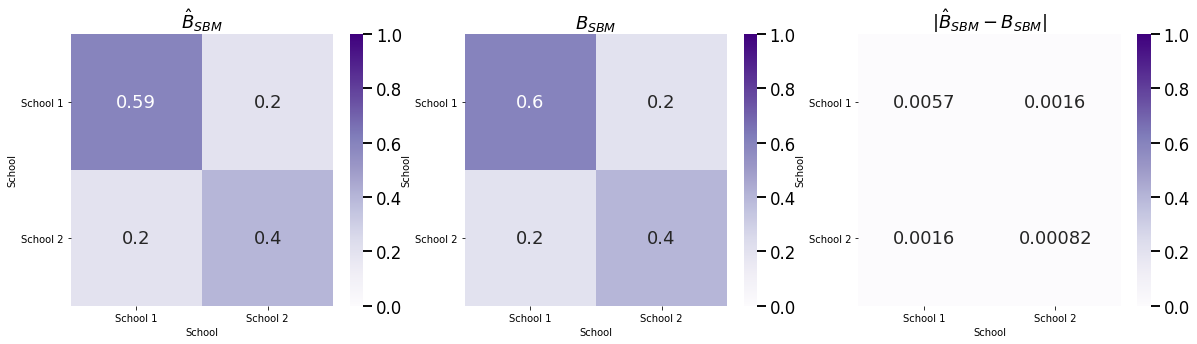

In [28]:
import seaborn as sns

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

def plot_block(X, title="", blockname="School", blocktix=[0.5, 1.5],
               blocklabs=["School 1", "School 2"], ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    with sns.plotting_context("talk", font_scale=1):
        ax = sns.heatmap(X, cmap="Purples",
                        ax=ax, cbar_kws=dict(shrink=1), yticklabels=False,
                        xticklabels=False, vmin=0, vmax=1, annot=True)
        ax.set_title(title)
        cbar = ax.collections[0].colorbar
        ax.set(ylabel=blockname, xlabel=blockname)
        ax.set_yticks(blocktix)
        ax.set_yticklabels(blocklabs)
        ax.set_xticks(blocktix)
        ax.set_xticklabels(blocklabs)
        cbar.ax.set_frame_on(True)
    return

plot_block(Bhat, title="$\\hat B_{{SBM}}$", ax=axs[0])

plot_block(B, title="$B_{{SBM}}$", ax=axs[1])

plot_block(np.abs(Bhat - np.array(B)),
        title="$|\hat B_{SBM} - B_{SBM}|$",
        ax=axs[2])

fig;

And our estimate $\hat B$ is very similar to the true block matrix $B$. 